In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Taken from logs
models = ["PaperQA Default", "PaperQA Gemini Embeddings", "gpt-4o-mini"]


paperqa_acc = [73.5, 53.1, 63.3, 75.5, 75.5, 63.3]
paperqa_prec = [84.8, 70.7, 81.8, 79.2, 91.1, 81.8]

paperqa_accuracy_mean = np.mean(paperqa_acc)
paperqa_accuracy_std = np.std(paperqa_acc)

paperqa_precision_mean = np.mean(paperqa_prec)
paperqa_precision_std = np.std(paperqa_prec)


gpt_4o_mini_acc = [30.6, 38.8, 36.7]
gpt_4o_mini_prec = [30.6, 38.8, 36.7]
gpt_4o_mini_accuracy_mean = np.mean(gpt_4o_mini_acc)
gpt_4o_mini_accuracy_std = np.std(gpt_4o_mini_acc)
gpt_4o_mini_precision_mean = np.mean(gpt_4o_mini_prec)
gpt_4o_mini_precision_std = np.std(gpt_4o_mini_prec)

gemini_embed_acc = [65.3, 69.4, 61.2, 63.3, 71.4, 63.3]
gemini_embed_prec = [80.0, 84.4, 79.5, 86.0, 82.6, 81.8]
gemini_embed_precision_mean = np.mean(gemini_embed_prec)
gemini_embed_precision_std = np.std(gemini_embed_prec)
gemini_embed_accuracy_mean = np.mean(gemini_embed_acc)
gemini_embed_accuracy_std = np.std(gemini_embed_acc)

cutoff_5_acc = [75.5]
cutoff_5_prec = [83.0]

cutoff_15_acc = [67.3, 67.3, 71.4]
cutoff_15_prec = [82.2, 78.3, 82.6]

top_1_acc = [63.3, 65.3, 67.3]
top_1_prec = [81.8, 80.0, 86.4]

top_10_acc = [61.2, 65.3]
top_10_prec = [79.5, 80.0]

accuracies = [paperqa_acc, gpt_4o_mini_acc, gemini_embed_acc, cutoff_5_acc, cutoff_15_acc, top_1_acc, top_10_acc]

precisions = [paperqa_acc, gpt_4o_mini_prec, gemini_embed_prec, cutoff_5_prec, cutoff_15_prec, top_1_prec, top_10_prec]


In [15]:
# Set style for publication quality
plt.style.use('bmh')
sns.set_context("paper", font_scale=1.5)

# Data from reproduce_results.ipynb
models = ["PaperQA (gpt-4o)", "PaperQA (gpt-4o) Gemini Embeddings", "gpt-4o-mini", "Answer Cutoff: 15", "Top-K: 1", "Top-K: 10"]

# Accuracy data
paperqa_acc = [53.1, 63.3, 75.5, 63.3]
gpt_4o_mini_acc = [30.6, 38.8, 36.7]
gemini_embed_acc = [65.3, 69.4, 61.2, 63.3, 71.4, 63.3]
cutoff_5_acc = [75.5]
cutoff_15_acc = [67.3, 67.3, 71.4]
top_1_acc = [63.3, 65.3, 67.3]
top_10_acc = [61.2, 65.3]

# Precision data
paperqa_prec = [70.7, 81.8, 79.2, 81.8]
gpt_4o_mini_prec = [30.6, 38.8, 36.7]
gemini_embed_prec = [80.0, 84.4, 79.5, 86.0, 82.6, 81.8]
cutoff_5_prec = [83.0]
cutoff_15_prec = [82.2, 78.3, 82.6]
top_1_prec = [81.8, 80.0, 86.4]
top_10_prec = [79.5, 80.0]

# Prepare data for plotting
accuracy_means = [
    np.mean(paperqa_acc),
    np.mean(gemini_embed_acc),
    np.mean(gpt_4o_mini_acc),
    # np.mean(cutoff_5_acc),
    np.mean(cutoff_15_acc),
    np.mean(top_1_acc),
    np.mean(top_10_acc)
]

accuracy_stds = [
    np.std(paperqa_acc),
    np.std(gemini_embed_acc),
    np.std(gpt_4o_mini_acc),
    # np.std(cutoff_5_acc),
    np.std(cutoff_15_acc),
    np.std(top_1_acc),
    np.std(top_10_acc)
]

precision_means = [
    np.mean(paperqa_prec),
    np.mean(gemini_embed_prec),
    np.mean(gpt_4o_mini_prec),
    # np.mean(cutoff_5_prec),
    np.mean(cutoff_15_prec),
    np.mean(top_1_prec),
    np.mean(top_10_prec)
]

precision_stds = [
    np.std(paperqa_prec),
    np.std(gemini_embed_prec),
    np.std(gpt_4o_mini_prec),
    # np.std(cutoff_5_prec),
    np.std(cutoff_15_prec),
    np.std(top_1_prec),
    np.std(top_10_prec)
]

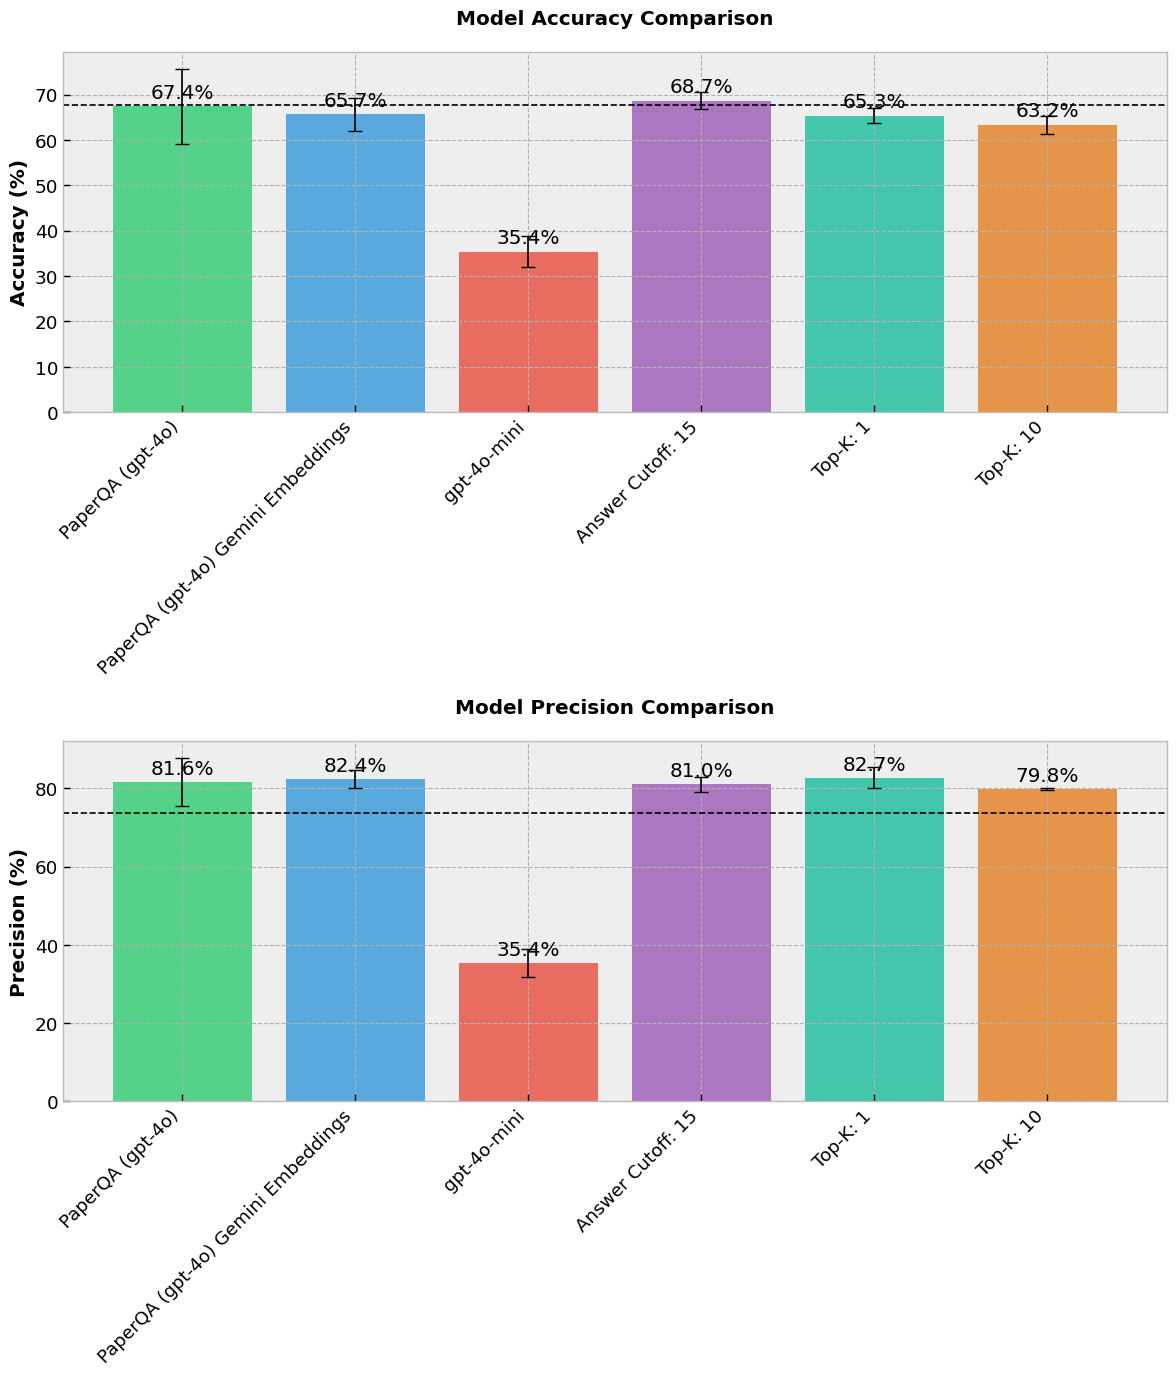

In [16]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))

colors = ['#2ecc71', '#3498db', '#e74c3c', '#9b59b6', '#1abc9c', '#e67e22']

# Plot accuracy
acc_bars = ax1.bar(models, accuracy_means, yerr=accuracy_stds, capsize=5, color=colors,
                 alpha=0.8)
ax1.set_ylabel('Accuracy (%)', fontweight='bold')
ax1.set_title('Model Accuracy Comparison', fontweight='bold', pad=20)
ax1.axhline(67.7, linestyle="--", color="black")
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Plot precision
prec_bars = ax2.bar(models, precision_means, yerr=precision_stds, capsize=5, color=colors,
                     alpha=0.8)
ax2.set_ylabel('Precision (%)', fontweight='bold')
ax2.set_title('Model Precision Comparison', fontweight='bold', pad=20)
ax2.axhline(73.8, linestyle="--", color="black")
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# Add value labels on top of bars
def add_value_labels(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

add_value_labels(ax1, accuracy_means)
add_value_labels(ax2, precision_means)

# Adjust layout
plt.tight_layout()